<a href="https://colab.research.google.com/github/AbdAllAh950/Algorithms/blob/main/T4_%D0%98%D1%81%D1%81%D0%B0_%D0%90%D0%B1%D0%B4%D0%B0%D0%BB%D0%BB%D0%B0(Abdallah_Essa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of Task 4 is to solve a nonlinear optimization problem by approximating noisy data generated from a specific function. We will also apply the Simulated Annealing method to the Travelling Salesman Problem (TSP) for a set of cities.

Implement and compare the performance of:\
1.Nelder-Mead\
2.Levenberg-Marquardt\
3.Simulated Annealing\
4.Particle Swarm Optimization

In [1]:
# Installing pyswarm library for Particle Swarm Optimization (PSO)
!pip install pyswarm

In [2]:
# Importing all required packeages
import numpy as np
import matplotlib.pyplot as plt

# for Nelder-Mead
from scipy.optimize import minimize

# scipy.optimize.dual_annealing method for Simulated Annealing. allowing you to define bounds for your parameters.
from scipy.optimize import dual_annealing

# scipy.optimize.least_squares for the Levenberg-Marquardt optimization. which is well-suited for nonlinear least squares problems.
from scipy.optimize import least_squares

# for Particle Swarm Optimization to optimize the loss function with defined lower and upper bounds.
from pyswarm import pso


**1.Nelder-Mead**

In [3]:
# Data Generation
np.random.seed(42)
k = np.arange(1001)
x_k = 3 * k / 1000
f_x = 1 / (x_k**2 - 3*x_k + 2)
delta_k = np.random.normal(0, 1, size=x_k.shape)

In [4]:
# Generating noisy data
y_k = np.where(f_x < -100, -100 + delta_k,
                np.where((f_x >= -100) & (f_x <= 100), f_x + delta_k,
                         100 + delta_k))

In [5]:
# Define the rational function and loss function
def F(x, a, b, c, d):
    return (a * x + b) / (x**2 + c * x + d)


In [6]:
def loss(params):
    a, b, c, d = params
    return np.sum((F(x_k, a, b, c, d) - y_k)**2)

In [7]:
# Optimization using Nelder-Mead
initial_guess = [1.0, 1.0, 1.0, 1.0]
result_nm = minimize(loss, initial_guess, method='Nelder-Mead')

In [8]:
# Results from Nelder-Mead
print("Nelder-Mead results:", result_nm.x)


Nelder-Mead results: [ 1.37384837 -2.74699685 -3.99898056  3.99799504]


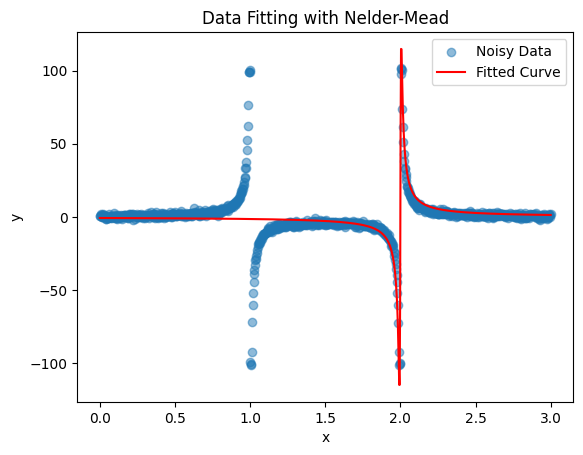

In [9]:
# Visualization of results
plt.scatter(x_k, y_k, label='Noisy Data', alpha=0.5)
plt.plot(x_k, F(x_k, *result_nm.x), color='red', label='Fitted Curve')
plt.legend()
plt.title('Data Fitting with Nelder-Mead')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**2.Levenberg-Marquardt Method**

In [10]:
# Define the residual function for Levenberg-Marquardt
def residuals(params):
    a, b, c, d = params
    return F(x_k, a, b, c, d) - y_k

In [11]:
# Initial guess
initial_guess = [1.0, 1.0, 1.0, 1.0]

In [12]:
# Optimize using least squares (Levenberg-Marquardt)
result_lm = least_squares(residuals, initial_guess)


In [13]:
# Results from Levenberg-Marquardt
print("Levenberg-Marquardt results:", result_lm.x)

Levenberg-Marquardt results: [-1.01546793  1.01603452 -2.0011997   1.00121659]


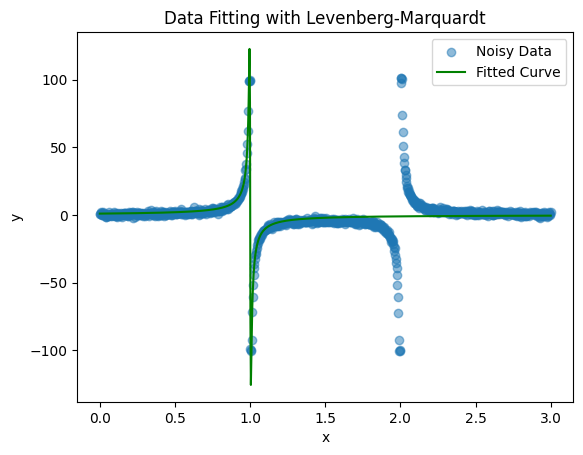

In [14]:
# Visualization of Levenberg-Marquardt results
plt.scatter(x_k, y_k, label='Noisy Data', alpha=0.5)
plt.plot(x_k, F(x_k, *result_lm.x), color='green', label='Fitted Curve')
plt.legend()
plt.title('Data Fitting with Levenberg-Marquardt')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


**3.Simulated Annealing**

In [15]:
# Define the bounds for parameters
bounds = [(-10, 10), (-10, 10), (-10, 10), (-10, 10)]  # Adjust bounds as necessary


In [16]:
# Define the objective function for optimization
def objective_function(params):
    return loss(params)

In [17]:
# Optimize using Simulated Annealing
result_sa = dual_annealing(objective_function, bounds)

In [18]:
# Results from Simulated Annealing
print("Simulated Annealing results:", result_sa.x)

Simulated Annealing results: [-1.00976844  1.01026918 -2.00095698  1.00097352]


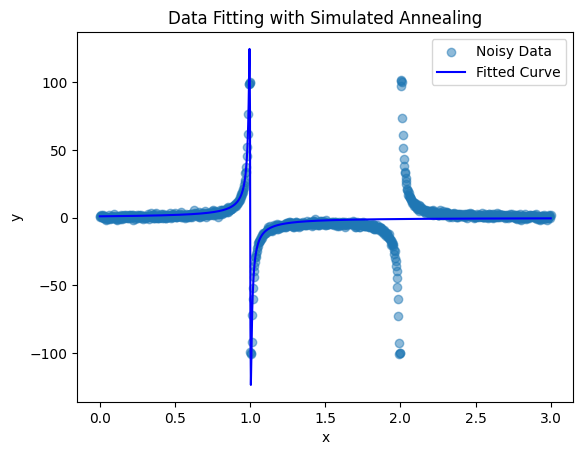

In [19]:
# Visualization of Simulated Annealing results
plt.scatter(x_k, y_k, label='Noisy Data', alpha=0.5)
plt.plot(x_k, F(x_k, *result_sa.x), color='blue', label='Fitted Curve')
plt.legend()
plt.title('Data Fitting with Simulated Annealing')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**4.Particle Swarm Optimization**


In [20]:
# Define the objective function for PSO
def objective_function_pso(params):
    return loss(params)

In [21]:
# Optimize using Particle Swarm Optimization
lb = [-10, -10, -10, -10]  # Lower bounds
ub = [10, 10, 10, 10]      # Upper bounds


In [22]:
result_pso, _ = pso(objective_function_pso, lb, ub)

Stopping search: maximum iterations reached --> 100


In [23]:
# Results from Particle Swarm Optimization
print("Particle Swarm Optimization results:", result_pso)

Particle Swarm Optimization results: [-2.7143128   2.71877191 -2.00375572  1.00408818]


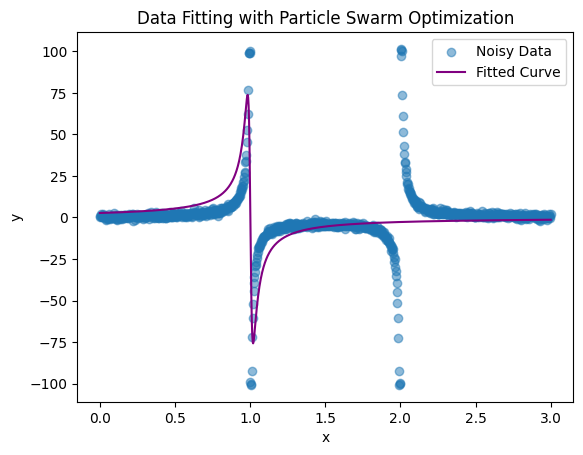

In [24]:
# Visualization of Particle Swarm Optimization results
plt.scatter(x_k, y_k, label='Noisy Data', alpha=0.5)
plt.plot(x_k, F(x_k, *result_pso), color='purple', label='Fitted Curve')
plt.legend()
plt.title('Data Fitting with Particle Swarm Optimization')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
